<a href="https://colab.research.google.com/github/AdityaKumar9471/Quant_assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/quant_assign.csv")

In [ ]:
data.head()

,datetime,open,close,high,low,volume,ema26_slow,ema12_fast,rsi
0,2012-05-21 03:45:00,257.445272,259.077804,261.452385,255.367505,7.933262e+06,293.064202,278.603909,35.607533
1,2012-05-22 03:45:00,264.074320,262.293396,266.795205,260.611374,8.598517e+06,290.784883,276.094599,38.193829
2,2012-05-23 03:45:00,259.325157,258.682039,262.639691,256.752673,7.857093e+06,288.406895,273.415744,36.424413
3,2012-05-24 03:45:00,260.017726,264.173271,265.212145,254.180190,8.885739e+06,286.611812,271.993825,40.907269
4,2012-05-25 03:45:00,262.936505,266.201558,268.922443,259.572510,5.253829e+06,285.099941,271.102707,42.519507


Plotting closing price of stock along with ema_fast and ema_slow


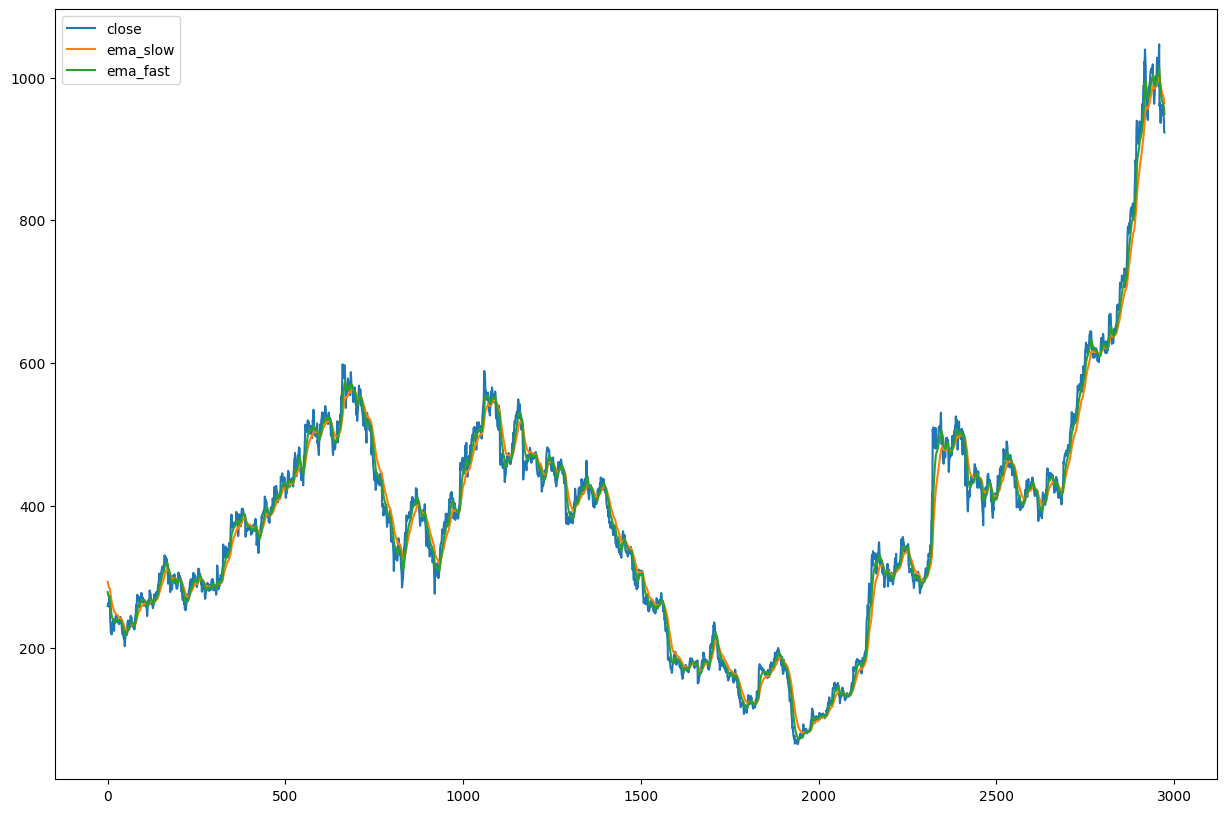

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(data["close"],label="close")
plt.plot(data["ema26_slow"],label="ema_slow")
plt.plot(data["ema12_fast"],label="ema_fast")
plt.legend()

Number of green candles and red candles in data

In [ ]:
green=data.loc[data["close"]>data["open"]]

red=data.loc[data["close"]<data["open"]]

In [ ]:
print("Number of green candles:" ,green.shape[0])
print("Number of red candles:" ,red.shape[0])


Number of green candles: 1306
Number of red candles: 1662


Maximum consecutive green candles

In [ ]:
current=0
max_count=0

for i in range(len(data)):
  if data.iloc[i]['close'] > data.iloc[i]['open']:
    current += 1
  else:
    current = 0
  max_count = max(max_count, current)

print("Maximum number of consecutive green candles:" , max_count)


Maximum number of consecutive green candles: 7


Number of candles where the opening price is almost equal to the closing price

In [ ]:
neutral_condition=abs(data["close"]-data["open"])<2
neutral=data.loc[neutral_condition]
print("Number of candles with almost equal opening and closing price:" ,neutral.shape[0])


Number of candles with almost equal opening and closing price: 775


Deriving and plotting the MACD-line and Signal Line from the data

0      -14.460293
1      -14.690284
2      -14.991151
3      -14.617987
4      -13.997234
          ...    
2969   -10.648550
2970   -11.180862
2971   -11.785599
2972   -13.692606
2973   -15.106443
Length: 2974, dtype: float64

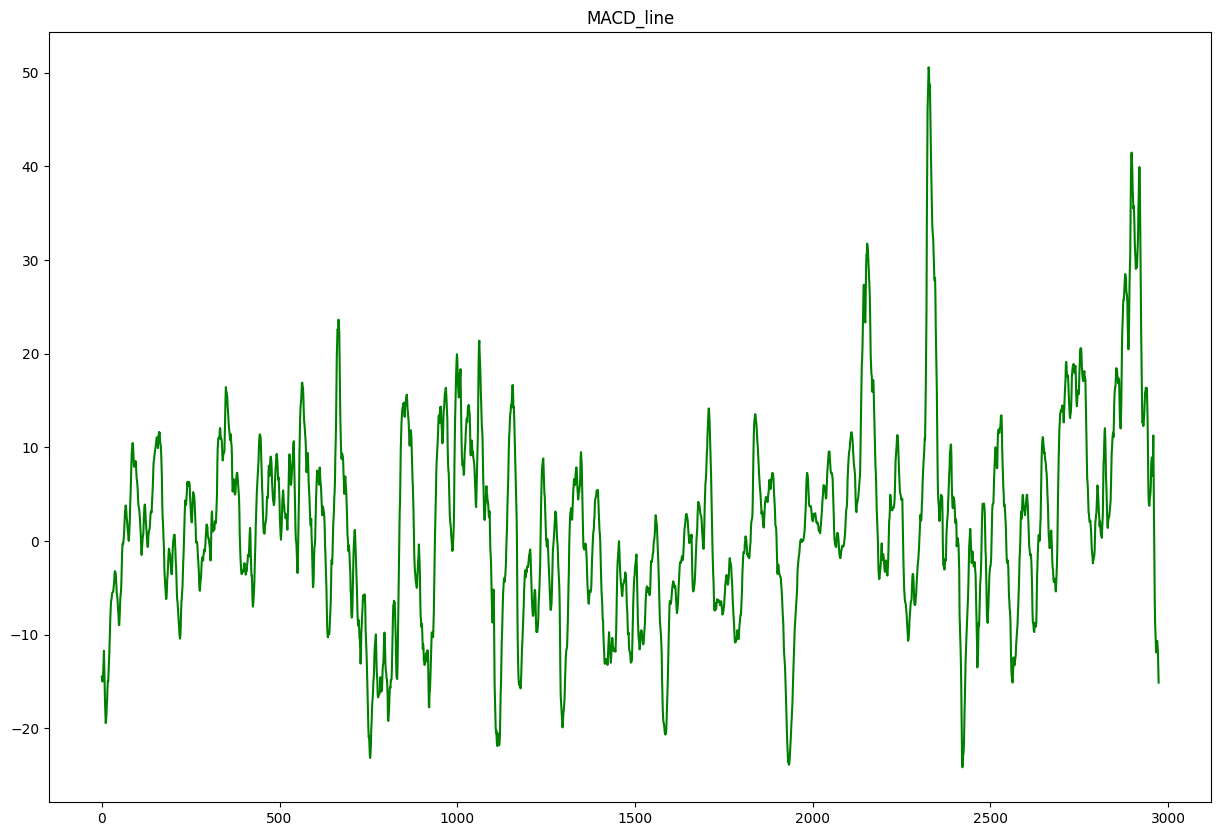

In [ ]:
MACD_line=data["ema12_fast"]-data["ema26_slow"]
plt.figure(figsize=(15,10)),
plt.title("MACD_line")
plt.plot(

    MACD_line,
    label="MACD_line",color="green")

MACD_line

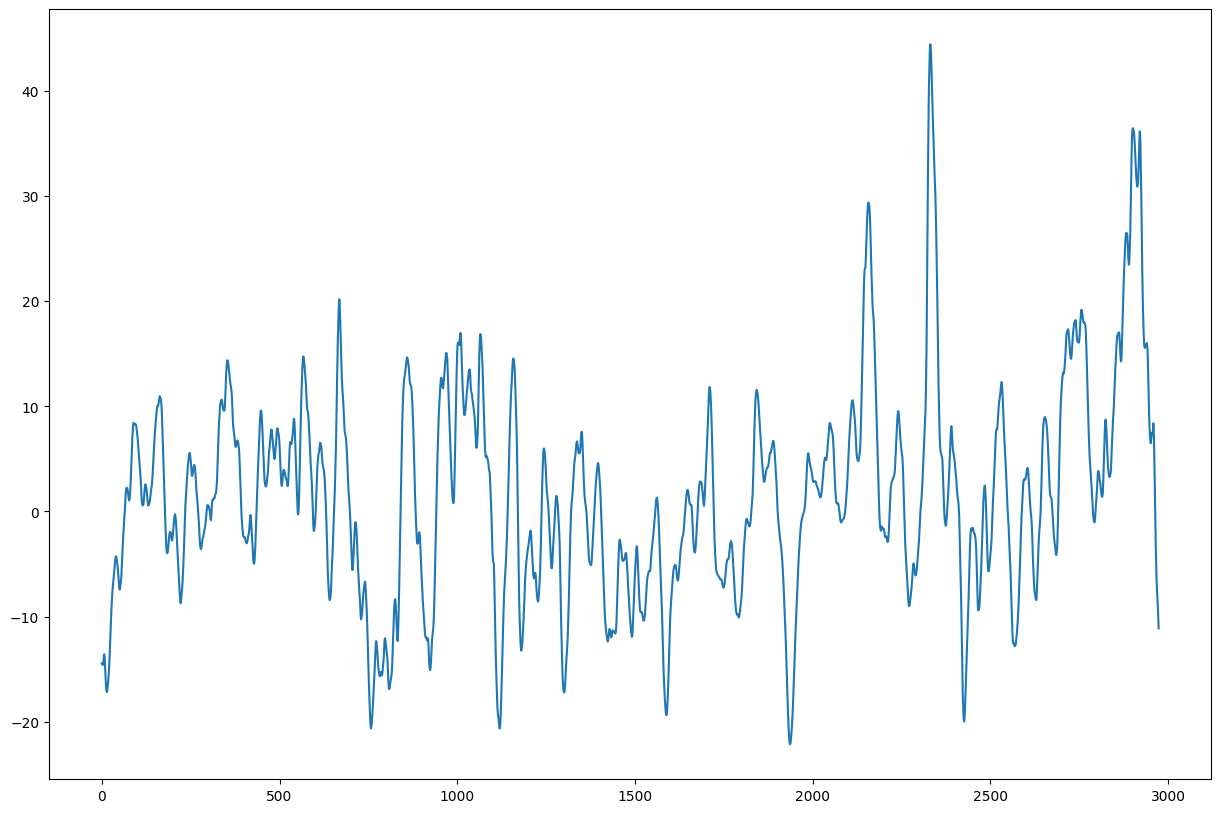

In [ ]:
def exp_moving_average(data,n):
  ema=[data[0]]
  weight=2/(n+1)
  for i in range(1,len(data)):
    ema.append((data[i]*weight)+(ema[i-1]*(1-weight)))
  return ema

Signal_line=exp_moving_average(MACD_line,9)
plt.figure(figsize=(15,10))
plt.plot(
    Signal_line
    )


Text(0.5, 1.0, 'Combined plot of MACD and Signal line')

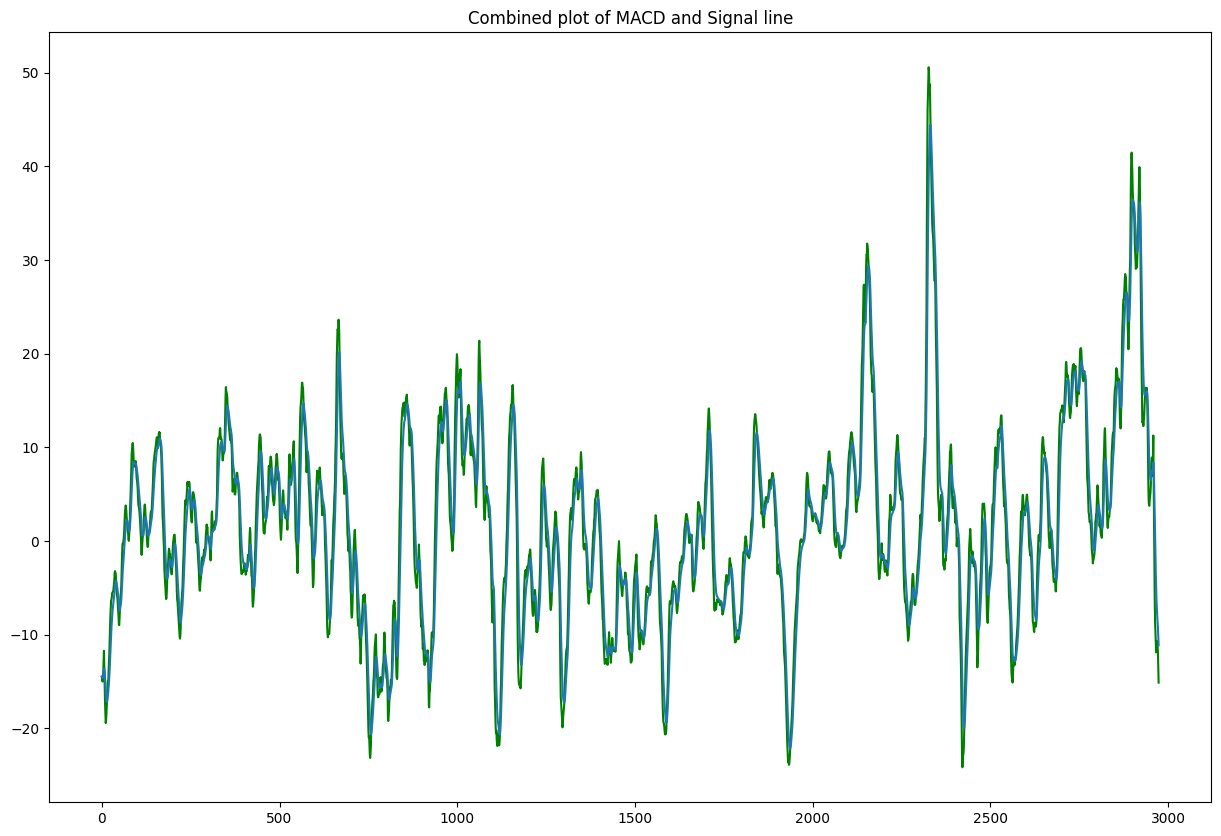

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(
    MACD_line,
    label="MACD_line",color="green")
plt.plot(
    Signal_line)

plt.title("Combined plot of MACD and Signal line")

Deriving the ATR values

In [ ]:
def calculate_ATR(data,n=22):
  tr=[]
  tr.append(data.iloc[0]["high"]-data.iloc[0]["low"])


  for i in range(1,len(data)):

    a=data.iloc[i]["high"]-data.iloc[i]["low"]
    b=abs(data.iloc[i]["high"]-data.iloc[i-1]["close"])
    c=abs(data.iloc[i]["low"]-data.iloc[i-1]["close"])
    tr.append(max(a,b,c))

  atr=[]

  atr.append(sum(tr[0:n])/n)       #for initial 22 values taking the average of true_range

  for i in range(n,len(tr)):
    atr.append((tr[i]+sum(tr[i-n+1:i]))/n)        #from 23 onwards calculating atr by moving window by one and taking moving average

  return atr


In [ ]:
ATR_values=calculate_ATR(data,22)

Text(0.5, 1.0, 'ATR VALUES')

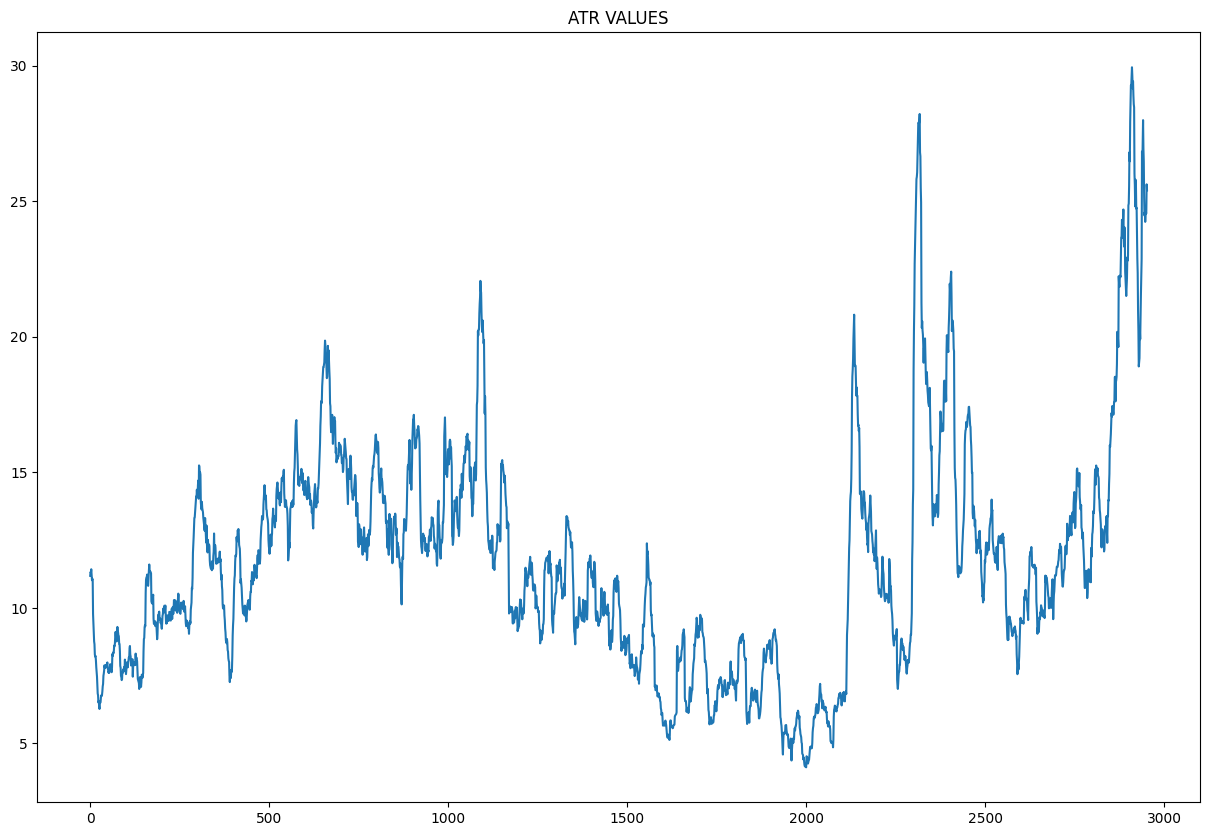

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(ATR_values)
plt.title("ATR VALUES")


Bonus question


In [ ]:
def average_gain_loss(data,n):
  gain=[]
  loss=[]

  for i in range(1,len(data)):
    a=data.iloc[i]["close"]-data.iloc[i-1]["close"]
    if a>0:
      gain.append(a)
    else:
      loss.append(abs(a))

  def calculate_average(df,n):        #This function will compute average_values from the list by taking a suitable window
    avg=[]
    avg.append(sum(df[0:n])/n)

    for i in range(n,len(df)):
      avg.append((df[i]+sum(df[i-n+1:i]))/n)

    return avg

  avg_gain=calculate_average(gain,n)
  avg_loss=calculate_average(loss,n)

  return avg_gain,avg_loss




In [ ]:
avg_gain,avg_loss=average_gain_loss(data,14)

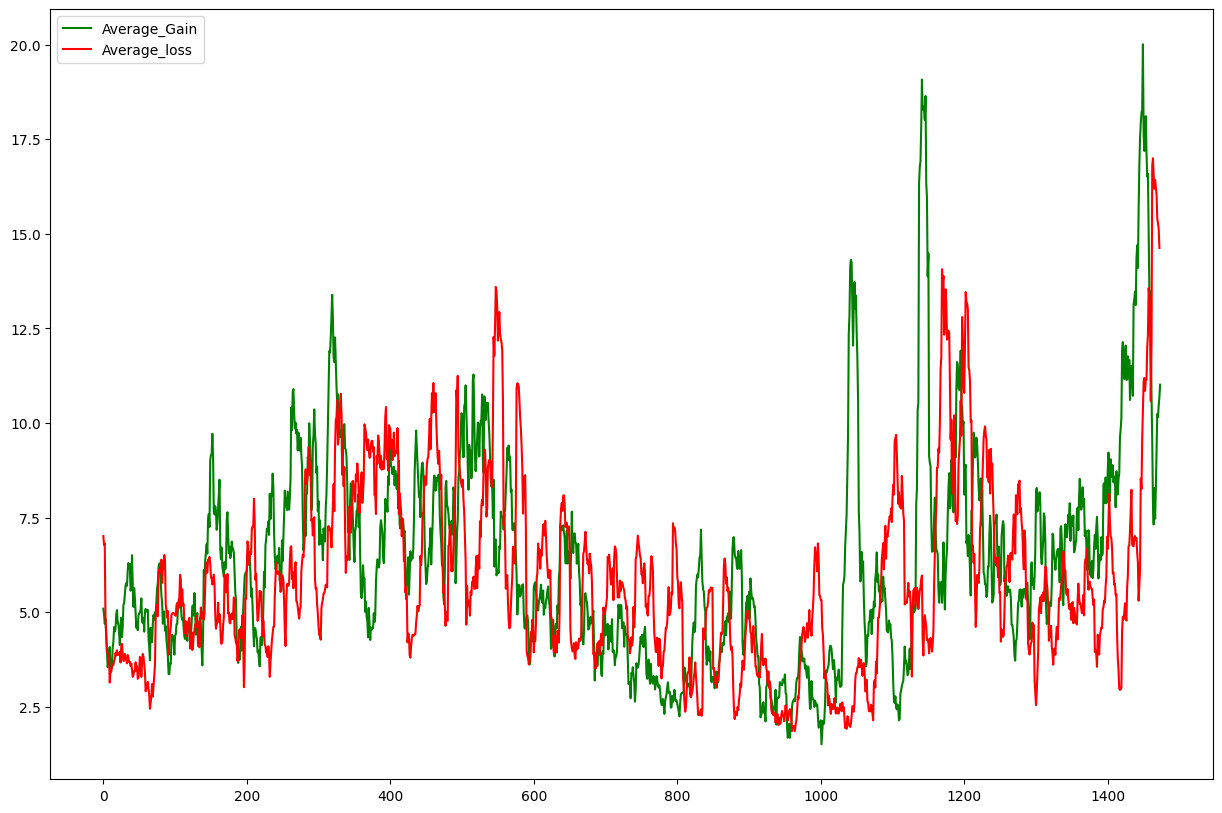

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(avg_gain,label="Average_Gain",color="green")
plt.plot(avg_loss,label="Average_loss",color="red")
plt.legend()

Text(0.5, 1.0, 'RSI VALUES')

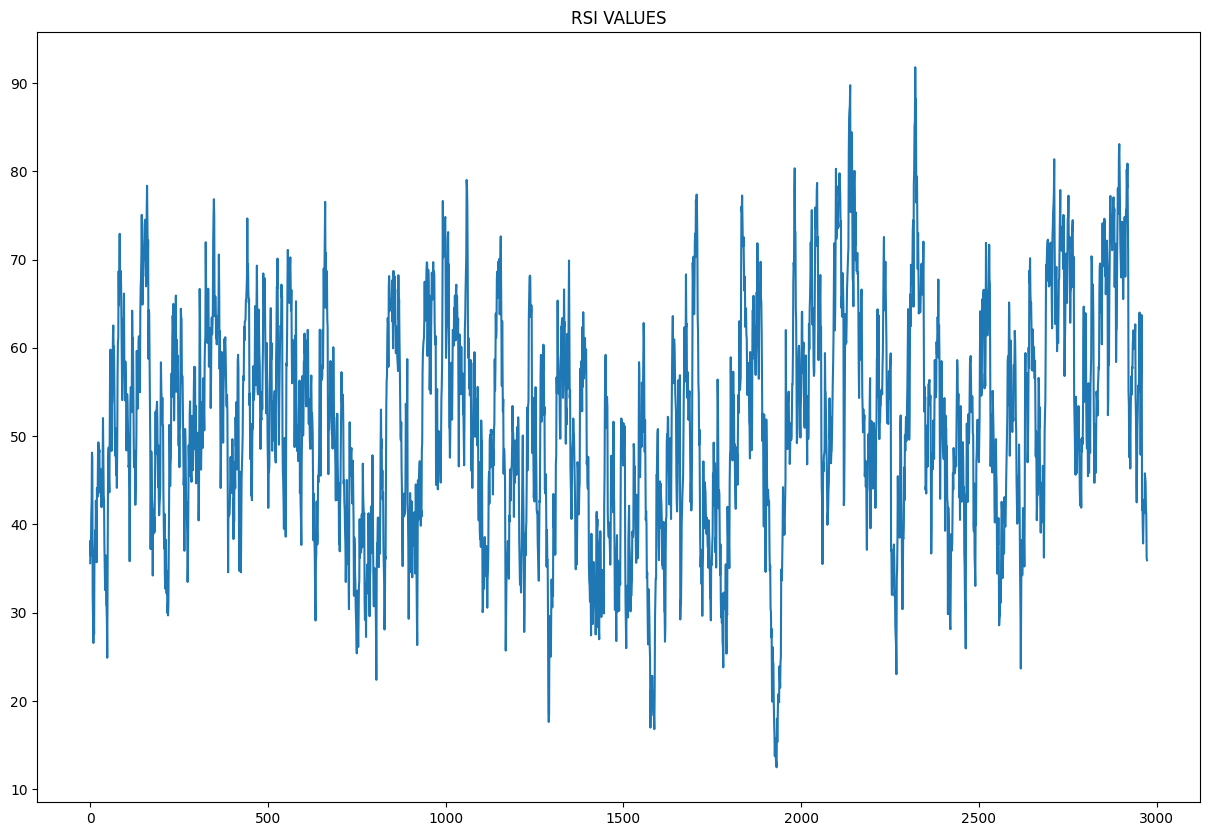

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(data["rsi"])
plt.title("RSI VALUES")